In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/countries-iso-codes-continent-flags-url/countries_continents_codes_flags_url.csv
/kaggle/input/countries-of-the-world/countries of the world.csv


# Dataset overview  
Hello there! Todays topic of discussion is centered around using K-means for creating clusters on our dataset to identify and recognize features. We will perform some exploration on our dataset and proceeed with the model after that. Lets dig in...

In [2]:
df=pd.read_csv('/kaggle/input/countries-of-the-world/countries of the world.csv',decimal=',')

We have quite a large number of columns in our dataset varying from the literacy rate, crop percentage, etc. This dataset was collected by the US Government and captures important aspects of each of the countries on the planet.

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Notice how we do have a small amount of null values in a few columns. However, this shouldn't be of a large concern to us.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


# Exploratory Data Analysis  
Lets being with the population first. 

In [6]:
px.histogram(df, x="Population")

Our histogram is extremely skewed due to a few large countries which reduces the readabilty of our chart. Lets go ahead and reset the X axis to show countries with a relatively smaller population

In [7]:
px.histogram(df[df['Population']<500000000],x='Population')

Now lets explore the GDP of the various different regions and see which ones are extremely high or low.

North America has an extremely large deviation mainly because of the presence of USA which is single handedly changing the mean. Hence it is responisble for the variations. The Sub-Saharan regions seem to have a really low GDP unsurprisingly, considering how they have small imports and exports.

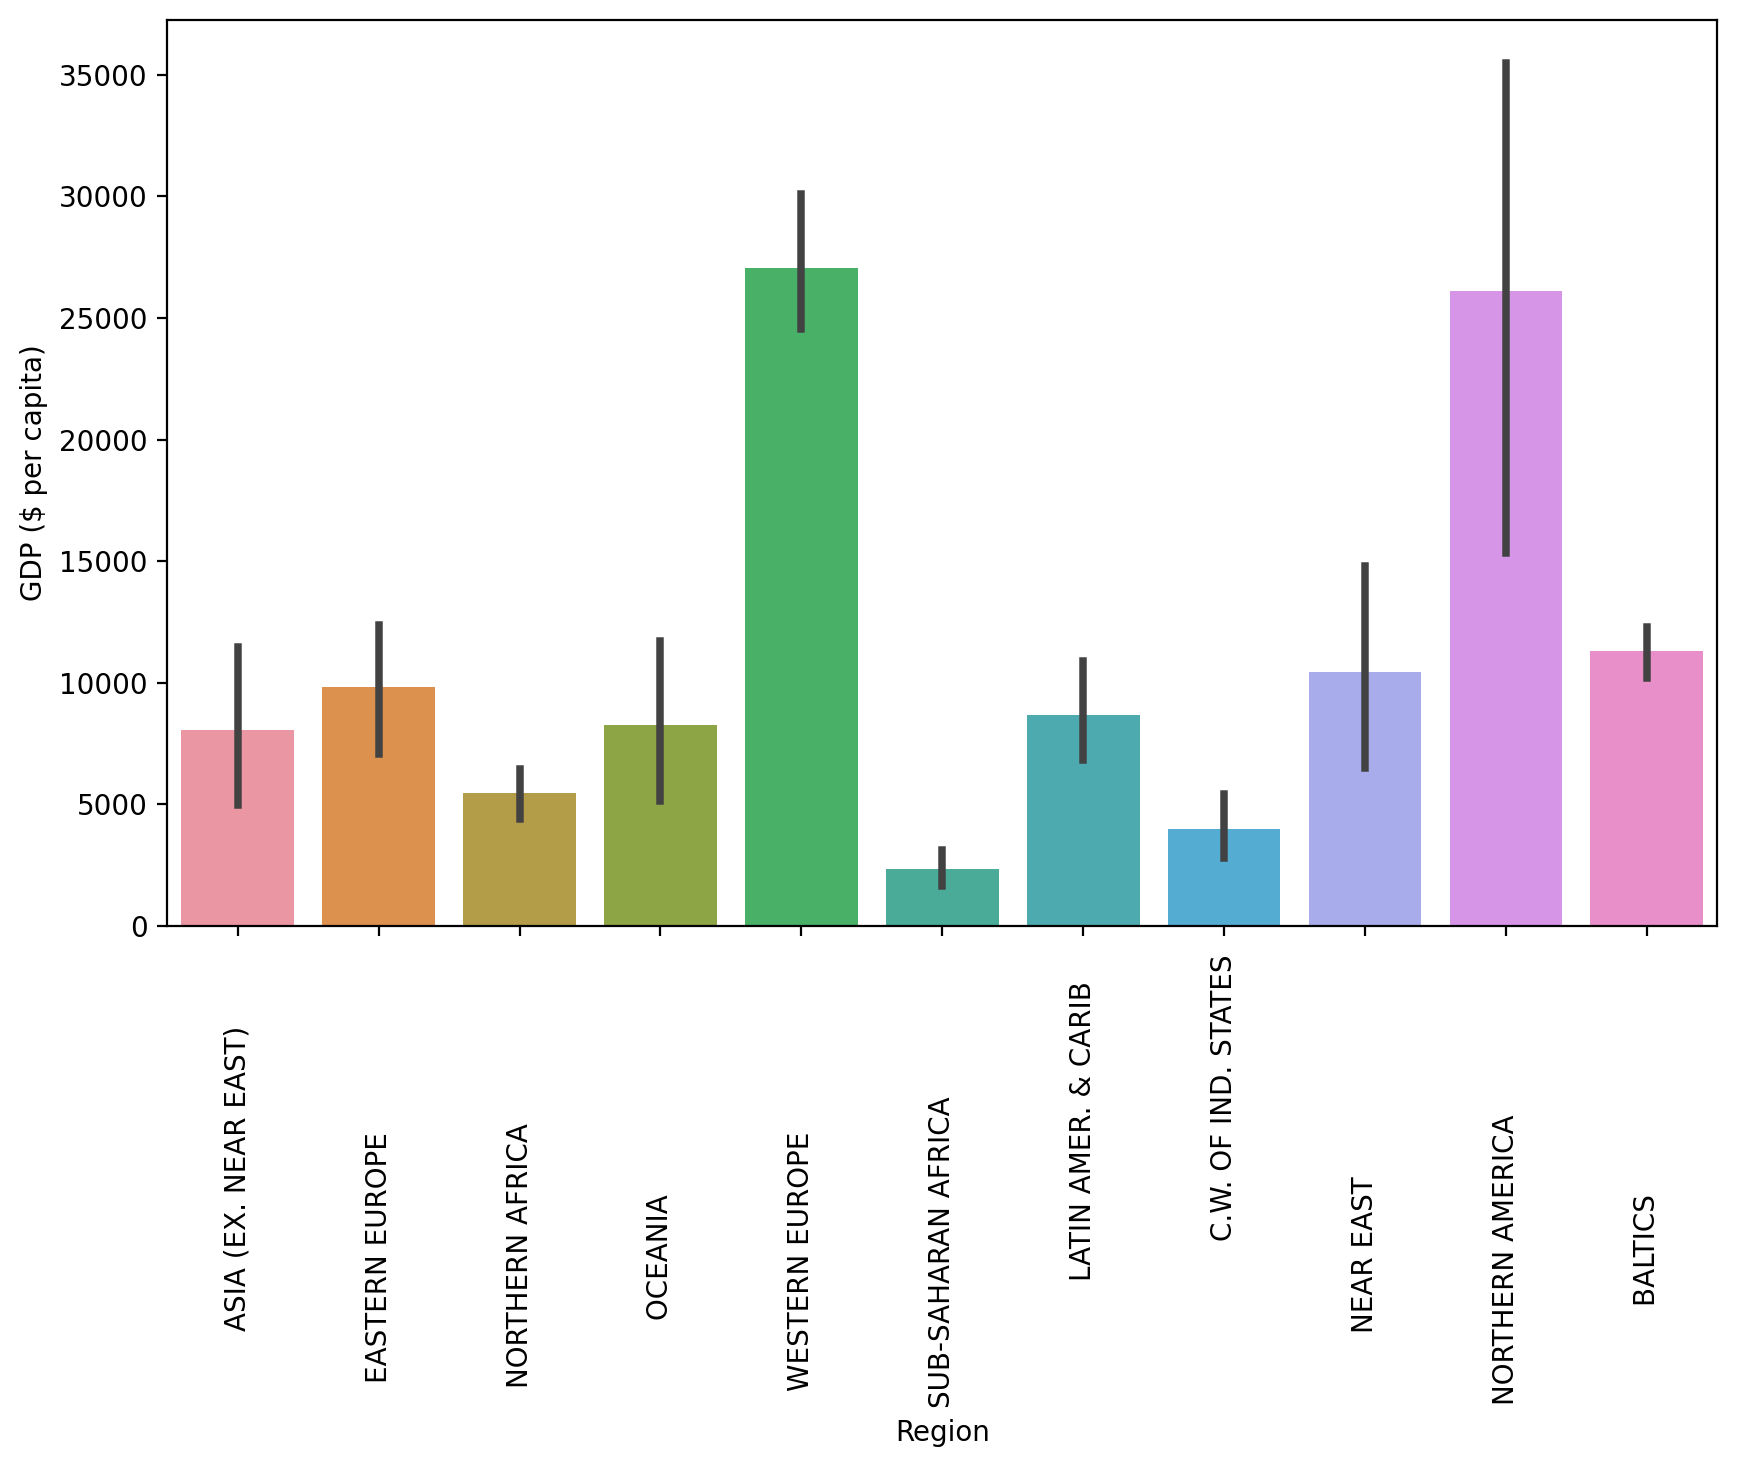

In [8]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);


Looking at the number of phones per 1000 people, we notice that it increases with the regions as the GDP increaes. As more and more people have greater wealth in a high GDP nation, they typically tend to have more  devices.

In [9]:
px.scatter(df, x="GDP ($ per capita)", y="Phones (per 1000)",color="Region")

Notice the outlier which has more than number of phones than they have for individual people! Quite fascinating. Lets see which country this is...

In [10]:
df[df['Phones (per 1000)']>1000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


Monaco! Not suprising, considering how tiny the nation is and the extreme number of wealthy people that reside ther.

Lets observe the Literacy Rate, which should increase as GDP increases...  
This is because a rising GDP is characteristic of larger trades and development which requires high literacy level for communication.

In [11]:
px.scatter(df, x="GDP ($ per capita)", y="Literacy (%)",color="Region")

In [12]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.023003,-0.039324,-0.043481,-0.030819,0.188251,-0.060757,-0.120606,-0.026546,-0.045090,-0.028367,0.000376,0.099333,-0.080852
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047470,-0.007163,0.072185,0.035994,0.053403,-0.079714,-0.143916,0.138974,-0.117134,-0.066423,0.040079,-0.050640,0.121565,-0.054369
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178038,-0.144238,0.195773,0.097230,0.280172,-0.081015,-0.031661,0.081859,0.009064,-0.159192,-0.070045,-0.107142,-0.139803,0.248774
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134145,-0.136577,0.049118,0.117095,0.152129,-0.120772,0.341820,-0.079494,-0.032579,-0.075765,-0.161866,-0.030250,-0.199995,0.196528
Net migration,0.000011,0.047470,0.178038,-0.134145,1.000000,-0.025015,0.382461,-0.008761,0.239601,-0.058170,-0.347968,0.225299,-0.015170,-0.066537,0.033611,-0.116719,-0.026324,0.127134
Infant mortality (per 1000 births),0.023003,-0.007163,-0.144238,-0.136577,-0.025015,1.000000,-0.600774,-0.765536,-0.672312,-0.113859,-0.062366,0.124100,-0.374406,0.845764,0.656338,0.709475,0.003322,-0.633982
GDP ($ per capita),-0.039324,0.072185,0.195773,0.049118,0.382461,-0.600774,1.000000,0.513144,0.834499,0.019768,-0.219229,0.097828,0.340791,-0.650137,-0.201661,-0.586769,-0.028926,0.550216
Literacy (%),-0.043481,0.035994,0.097230,0.117095,-0.008761,-0.765536,0.513144,1.000000,0.601935,0.105021,0.042825,-0.107563,0.392081,-0.790846,-0.393946,-0.609638,0.064733,0.494607
Phones (per 1000),-0.030819,0.053403,0.280172,0.152129,0.239601,-0.672312,0.834499,0.601935,1.000000,0.061022,-0.152420,0.029900,0.402161,-0.724614,-0.260309,-0.601739,-0.152452,0.683934
Arable (%),0.188251,-0.079714,-0.081015,-0.120772,-0.058170,-0.113859,0.019768,0.105021,0.061022,1.000000,0.094361,-0.856763,0.380031,-0.186823,0.053472,-0.034822,-0.063618,0.091126


There are some extremely correlated values spaced by some unrelated values as well. We cant really make much out of this information at the moment.

In [13]:
px.imshow(df.corr())

# Dendogram  
A dendrogram is a graphical representation of a hierarchical tree structure. It is commonly used to visualize the results of hierarchical clustering, a method of grouping similar objects based on their similarity or distance. In a dendrogram, each leaf represents a single object and each branch represents a group of objects that are more similar to each other than to objects in other branches. The length of the branches and the position of the branches on the tree can be used to represent the degree of similarity or distance between the objects.  
We'll go ahead and create a dendogram for the correlation matrix

In [14]:
ff.create_dendrogram(df.corr())

# Filling Null values

In [15]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [16]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa 
4                   Andorra 
78                Gibraltar 
80                Greenland 
83                     Guam 
134                 Mayotte 
140              Montserrat 
144                   Nauru 
153      N. Mariana Islands 
171            Saint Helena 
174    St Pierre & Miquelon 
177              San Marino 
208       Turks & Caicos Is 
221       Wallis and Futuna 
223          Western Sahara 
Name: Country, dtype: object

In [17]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

We can safely assume that the climate, literacy rate, etc in certain countries is similair to that of its surrounding countries. So we will group them and fill them in with the mean value of the regions.

In [18]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [19]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [20]:
df = df.dropna()

# Creating our K-Means Model  
K-means is a popular unsupervised machine learning algorithm for clustering. The goal of K-means is to partition a set of points into K clusters, where each point belongs to the cluster with the closest mean. The algorithm begins by randomly selecting K centroids, which are the initial means of the K clusters. It then assigns each point to the cluster whose centroid is closest to it, based on a distance metric such as Euclidean distance. Once all points have been assigned to a cluster, the centroids are recalculated as the mean of the points in each cluster. The process of assigning points to clusters and updating centroids is repeated iteratively until the clusters are stable. The final result is K clusters, each represented by a centroid, and each point is associated with one of the K clusters.

In [21]:
X = df.drop("Country",axis=1)

In [22]:
X = pd.get_dummies(X)
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


Since we have values which are on varying scales, we are required to scale them down. Lets go ahead and do that.

In [23]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

Now, unlike supervised learning algorithms where we can compare the error with known values, how do we compare and get the values when we do not have a label set at all? We instead change our perception of accuracy and determine it by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration's assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. 

Lets calculate the K-means SSE for a few different models with different K values. Usually, the higher the K value the better the clusters SSE value, however we then become prone to overfitting.

Note that there are a large number of hyperparameters that can be modified in order to get the most optimal clusters. The main ones are:

    1.n_clusters: The number of clusters to form as well as the number of centroids to generate.

    2.init: The method for initialization of the centroids. It can take values such as 'k-means++' for a smart initialization, 'random' for selecting k observations (rows) at random from data for the centroids, or you can pass an ndarray with shape (n_clusters, n_features) giving the initial centers.

    3.n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

    4.max_iter : Maximum number of iterations of the k-means algorithm for a single run.

    5.tol : relative tolerance with regards to inertia to declare convergence.

In [24]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Now we can plot this and attempty to find the elbow point, which is the point where this distortion declines the most.

In [25]:
px.line(x=range(2,30), y=ssd, title='SSE vs K Values',markers=True)

In [26]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)
model.labels_

array([1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1], dtype=int32)

In [27]:
X['K=3 Clusters'] = model.labels_

We can now observe the correlation of the different columns with respect to the clusters. Seems like the algorithm chose certain features much higher than that of others.

In [28]:
X.corr()['K=3 Clusters'].sort_values()

GDP ($ per capita)                           -0.589339
Region_WESTERN EUROPE                        -0.553122
Phones (per 1000)                            -0.494858
Climate                                      -0.410376
Net migration                                -0.356981
Deathrate                                    -0.345268
Region_EASTERN EUROPE                        -0.297113
Service                                      -0.247332
Arable (%)                                   -0.214653
Region_BALTICS                               -0.177698
Pop. Density (per sq. mi.)                   -0.174920
Literacy (%)                                 -0.123004
Region_SUB-SAHARAN AFRICA                    -0.100389
Region_NORTHERN AMERICA                      -0.085462
Area (sq. mi.)                                0.020773
Other (%)                                     0.040395
Region_ASIA (EX. NEAR EAST)                   0.060406
Coastline (coast/area ratio)                  0.072183
Population

# Creating our Geographical Model  
The best way to interpret this clustering model is through visualizing the clusters of countries on a map. We can use the plotly cloropleth map which can generate an interactive world map for us with these cluster values filled in.

We will however require the ISO code of the various different countries. Lets make a dictionary and add in the respective countries ISO codes.

In [29]:
iso_codes = pd.read_csv("/kaggle/input/countries-iso-codes-continent-flags-url/countries_continents_codes_flags_url.csv")


In [30]:
iso_mapping = iso_codes.set_index('country')['alpha-3'].to_dict()

In [31]:
df['Country']=df['Country'].str.strip()
df['Country']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
222         West Bank
223    Western Sahara
224             Yemen
225            Zambia
226          Zimbabwe
Name: Country, Length: 221, dtype: object

In [32]:
df['ISO Code'] = df['Country'].map(iso_mapping)


For this purpose, we would use a higher value of K for easier visual purposes and understanding. The next largest elbow point seems to occur at k=15, so lets pick that.

In [33]:
model = KMeans(n_clusters=15)
    
model.fit(scaled_X)

KMeans(n_clusters=15)

In [34]:
df['Cluster'] = model.labels_

In [35]:
px.choropleth(df, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )

There we have it! We experimented with different values for the algorithm and got our clusters. K Means is an extremely useful tool to get an insight into the dataset and explore various features.  
Thas all for today!